# Day 9: Hypothesis Testing & Acceptable Error

## What is null hypothesis?
It is the formal method of reaching conclusions based on population statistics and sample data where we apply changes to a population

## Null hypothesis examples
- Rain dance, cultures people dance together to have rain during periods of drought
- We want to test if a drug has an impact on the brain
- Does a food boost your IQ?
- A/B testing //*like testing user engagement*

----

## Review of Z Distribution, CDF, and SF (survival)
### Z-Distribution
- Z-distribution is another name for standard **Normal distribution**
- When the samples of our numerical array are Normal with an arbitrary mean and std
- If scale each element by subtracting elements from the mean, and divide over the std, then the new array would be a Normal distribution with zero mean, and std 1

### Probability Distribution Function (PDF)
- PDFs have a similar pattern to histogram. The only difference is that we normalize the value of histograms

### Cumulative Density Function (CDF)
- In above example, we could not easily obtain the percentage from a PDF, although it is possible. 
- This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a threshold value
- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:
	1.	Find the minimum value in the array
	2.	Set the threshold to be the minimum value of the array
	3.	For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
	4.	Repeat step three, increasing the threshold by one, until you go through step three where threshold is equail to the maximum value in the array

![Image of CDF and Z-Distribution](static/images/cdf_and_z-distribution.png)

### Review of Z distribution, CDF and SF
Activity: Generate 10000 sample as a random variable with Normal distribution with pre-define mean and standard deviation. Hint = ```from scipy.stats import norm norm.rvs(loc= , scale= , size=10000)```

Write a code to show that $Z = \frac{X - \mu}{\sigma}$, is standard Normal Hint: Plot histogram of Z, show Z is standard normal

## Null hypothesis drug example on rat //22m
A neurologist is testing the effect of a drug on response time by **injecting 100 rats** with a unit dose of a drug, subjecting each to neurologist stimulus and recording its response time. The neurologist knows that the **mean response time for rats not injected with the drug is 1.2 seconds**. The **mean of the 100 injected rats's response time is 1.05 seconds with population standard deviation of 0.5 seconds**. Do you think the drug has effect on response time?

$H_o :$ Drug has no effect ==> $\mu_x = 1.2$ even with drug 

$H_a :$ Drug has effect ==> $\mu_x \neq 1.2$ when the drug is given

![STD Formula](static/images/std_formula.png)

## Z-Distribution vs T-Distribution
https://docs.google.com/presentation/d/1BQibGlrpX71JU0jBU0C7zJJr6S_4WQeFzO7PBmnxf8g/edit#slide=id.g5c1d9ce33d_0_10

#### Slide 1: Definitions
- μ = Population mean for Scenario A
- 𝞼 = standard deviation (std) for Scenario A
- 𝛼 = statistical significance level
- X̅ = Sample Mean for Scenario B
- N = Number of samples for Scenario B
- S = Sample std for Scenario B

### Slide 2: 
- μ = Population mean for Scenario A
- 𝞼 = Population standard deviation (std) for Scenario A
- 𝛼 = statistical significance level
- X̅ = Sample Mean for Scenario B
- N = Number of samples (e.g. = 100) for Scenario B
- S = Sample std for Scenario B
- μx = Population mean for Scenario A is unknown


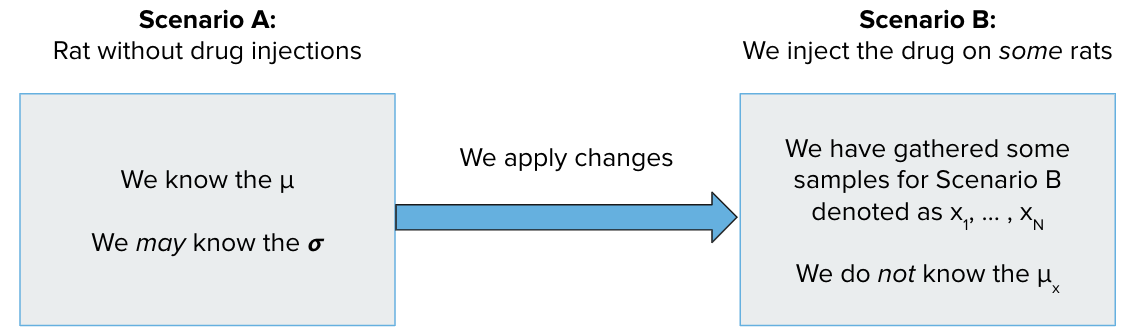

### Slide 3

Goal: 
We want to have a conclusion about μx for Scenario B

### Slide 4

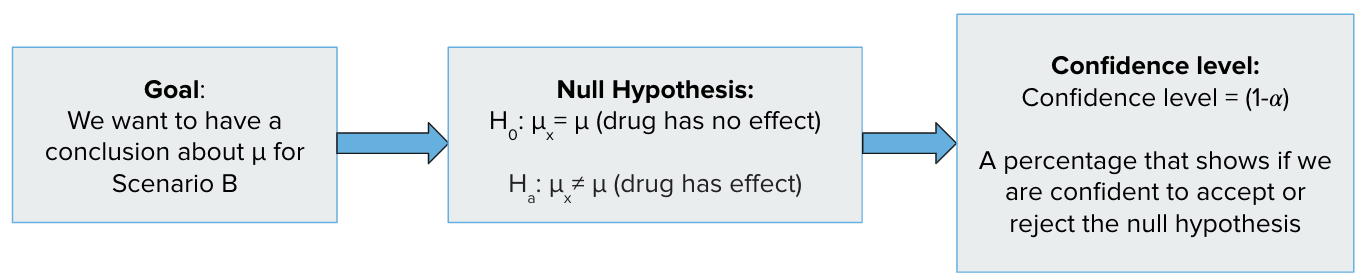

### Slide 5
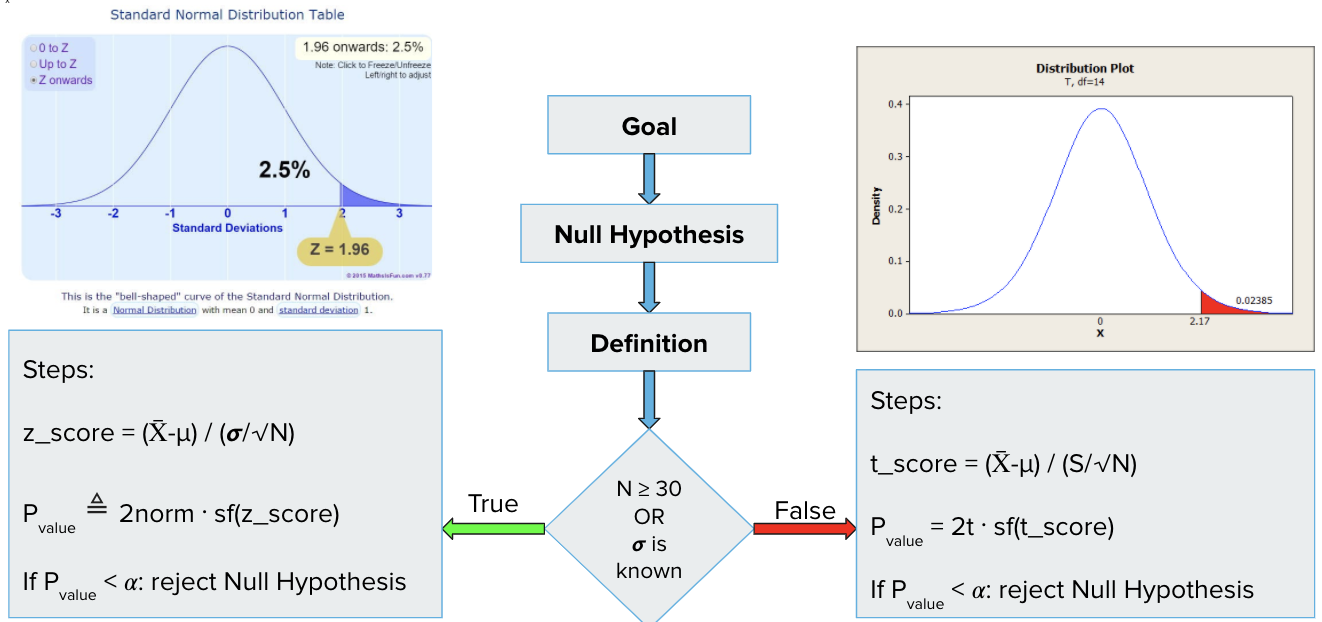

### Slide 6
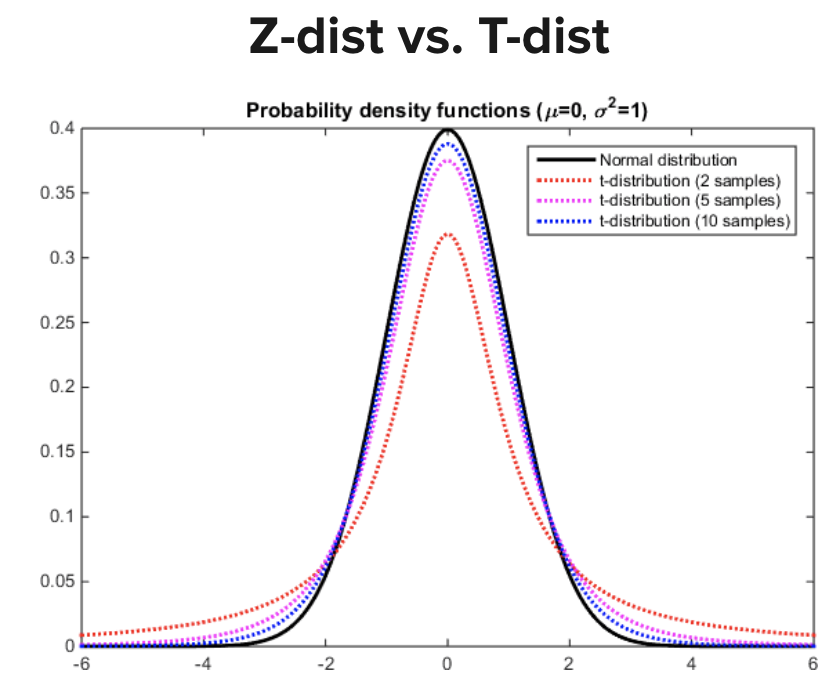

----

## The steps to reject or accept the null hypothesis
1. The population mean is known, $\mu$ **//mu**
2. The sample mean is known, $\bar{x}$ 
3. Define a significant level, $\alpha$ **//alpha = if alpha is 0.05, our confidence level is 95%**
4. If $N$ > 30, calculate z-score, $z_{score} = \frac{\bar{x} - \mu}{\sigma/\sqrt{N}}$ 
5. Calculate p_{value}, $p_{value} = 2SF(|Z_{score}|)$ 
    - **Note that we multiplied by 2 because alternative is $\neq$ written as $\mu_x \neq 1.2$. If it would have been >= or <= you do not multiply by 2**
6. Decision: if $p_{value} < \alpha$ then reject the null hypothesis

## Activity: z-test 
Write a function the takes **the mean of population, significant level, and the samples** as the input argument then **decide to reject or accept the null hypothesis** for drug effect on rat

Recall: 
- $\mu = 1.2$
- $\bar{x} = 1.05$
- $N = 100$ 
- $\sigma = 0.5$

In [15]:
from scipy.stats import norm
import numpy as np

def accept_or_reject_null_hypothesis(mu, sample_mean, significant_level, N, sigma):
    # Step 4 - Calculate standard deviation of the sampling distribution
    sample_std = sigma / N

    # Calculate z-score from population mean (mu), sample mean and sample std
    z = (sample_mean - mu) / sample_std

    # Step 5- Calculate p-value from z-score
    p_value = 2 * norm.cdf(-np.abs(z))

    # Step 6 - Determine whether to accept or reject null hypothesis
    if p_value < significant_level:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')
        
accept_or_reject_null_hypothesis(1.2, 1.05, 0.05, 100, 0.5) #alpha of 0.05

reject null hypothesis


## Activity: T-test
The average British man is 175.3 cm tall. A survey recorded the heights of 10 British men who drank a special type of Milk for 2 years.

Calculate the t-score from the previous formula and use the available function in stats.ttest_1samp. Compare what you will get with x as your input:

```x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]```

We want to know whether the mean of the sample is different from the population mean

$T_{score} = (X̅-μ) / (S/√N)$

In [16]:
from scipy import stats
import numpy as np

x = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
mu = 175.3
sample_mean = np.array(x).mean()

# Calculate the standard deviation of sample distribution

N = len(x) # number of data samples (Numerator)
S = np.array(x).std(ddof=1) #standard deviation
den = S /np.sqrt(N) #denominator

# t-test from formula
t = (sample_mean - mu)/den
print("t-statistic: ",t)

# one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  2.295568968083183
t =  2.295568968083183 , p =  0.04734137339747034


##### So, we conclude that Milk has an effect on the heights

### Note:
We can calculate $T_{score}$ and $P_{value}$ from scipy's stats like so

Mu ($\mu$) is the population mean known as

```t, p = stats.ttest_1samp(arr, mu)```

## Activity: z-test or t-test

Write a function that determines whether to use **z-test** or **t-test** in order **to accept or reject null hypothesis**

#### Note: To determine to use Z-test or T-test consider the following:
- Use **z-test** if **sigma is known**
- Also use **z-test** if **length of data sample is greater than 30**
- Use **t-test** if sigma is **not known** or **length of data sample is less than 30**

In [17]:
def z_t_null_hypothesis(data_sample, mu, sigma, significant_level):
    # If sigma is known, calculate using the z-test
    if sigma:
        z_score = (np.mean(data_sample)-mu)/(sigma/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    # If the data_sample is greater than 30, calculate using the z-test
    elif len(data_sample) > 30:
        z_score = (np.mean(data_sample)-mu)/(np.std(data_sample)/np.sqrt(len(data_sample)))
        p = scipy.stats.norm.sf(abs(z_score))*2
    # otherwise, calculate using the t-test
    else:
        t, p = stats.ttest_1samp(data_sample, mu)

    if p < significant_level:
        print('reject null hypothesis')
        
    else:
        print('accept null hypothesis')

## What is a one-tail or two-tail calculation for a p-value?
If the alternative hypothesis says the mean of a sample is different from the mean of the population, we should compute the p-value using two-tail. If it says the mean of a sample is greater or lower than the mean of a population, we should compute using one-tail

## Possible errors that can happen when accepting or rejecting the null hypothesis
**Type I error**: We reject the null hypothesis when the null is true

$\alpha$ = P(rejecting $H_o$ $|$ $H_o$ is true)

**Type II error**: We accept the null hypothesis when it is not true

$\beta$ = P(accepting $H_o$ $|$ $H_o$ is false)

The drug has an effect on the brain

The drug has no effect on the brain

## Other examples for statistical test
Please read the Unpaired t-test part of this article

http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python


## t-tests in python
The t-test is a mainstay of basic analysis in many fields. In python the scipy.stats module offers **1-sample**, **two-sample unpaired**, and **paired t-tests**.

###  1-sample t-test
The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.
```
from scipy import stats
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

one_sample = stats.ttest_1samp(one_sample_data, 175.3)

print "The t-statistic is %.3f and the p-value is %.3f." % one_sample
```

```
The t-statistic is 2.296 and the p-value is 0.047.
```

Here we can conclude that the average height of our sample is significantly different (p <  0.05) from the average British male height. The return value is the result of a two-sided t-test and is a tuple containing the t-value and the p-value.

### Unpaired t-test
This test compares two unrelated samples. In the example below data was collected on the weight (kg) of 8 elderly women and 8 elderly men. We are interested in whether the weights of these two samples is different.
```
female = [63.8, 56.4, 55.2, 58.5, 64.0, 51.6, 54.6, 71.0]
male = [75.5, 83.9, 75.7, 72.5, 56.2, 73.4, 67.7, 87.9]

two_sample = stats.ttest_ind(male, female)

print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

# assuming unequal population variances
two_sample_diff_var = stats.ttest_ind(male, female, equal_var=False)

print "If we assume unequal variances than the t-statistic is %.3f and the 
p-value is %.3f." % two_sample_diff_var
```

```
The t-statistic is 3.588 and the p-value is 0.003.
If we assume unequal variances than the t-statistic is 3.588 and the p-value is 0.004.
```

Here we can conclude that the weights of men and women are indeed different (p <  0.01). Like the 1-sample test above the return value is a tuple containing the t-statistic and the p-value and these are the results of a two-sided test. If we suspect that the samples we are looking at come from populations with unequal variances we can set the equal_var parameter in the test to False. The results are then from Welch’s t-test, which does not assume equal population variance.

### Paired t-test
The paired t-test is used when we have two sets of repeated measures i.e. we have measured some parameter on the same subjects at different times (or under different conditions). In the example the weight of 9 people were recorded before they had abdominal surgery and then again 5 months later. We are asking if surgery leads to a change in weight.
```
baseline = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]
follow_up = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

paired_sample = stats.ttest_rel(baseline, follow_up)

print "The t-statistic is %.3f and the p-value is %.3f." % paired_sample
```

```
The t-statistic is 3.668 and the p-value is 0.006.
```
From the results we see that weight has changed significantly between pre- and post-surgery (p <  0.01).

### Homework
https://docs.google.com/document/d/1ITryiXU_VoyBvtZY4deehk4PmlieSlF7rSNc8sBU3Sw/edit